![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Lecture 8 - Deep Learning Basics</center>
### <center> CNN Architectures<center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/08_CNN_Architectures/MainArchitectures.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

In [4]:
import torch
import torchvision
import torchsummary

### Get ImageNet labels:
ImageNet labels:  
https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

In [7]:
import json
dClasses = json.load(open('imagenet_class_index.json'))
lClasses = [dClasses[str(k)][1] for k in range(1000)]
#-- Some labels for exapmle:
lClasses[0], lClasses[2], lClasses[999]

('tench', 'great_white_shark', 'toilet_tissue')

### Some images:

In [8]:
lUrls = [
    'https://farm3.static.flickr.com/2278/2096798034_bfe45b11ee.jpg',
    'https://static.flickr.com/48/116936482_7458bb78c1.jpg',
    'https://farm4.static.flickr.com/3001/2927732866_3bd24c2f98.jpg',
    'https://farm4.static.flickr.com/3018/2990729221_aabd592245.jpg',
    'https://farm4.static.flickr.com/3455/3372433349_0444709b8f.jpg'    
]

### URL to image:

In [9]:
import urllib
from torchvision import transforms
from PIL         import Image

def GetImageFromUrl(url):
    fileName = '__TempImage__.jpg'
    try:
        urllib.URLopener().retrieve(url, fileName)
    except:
        urllib.request.urlretrieve(url, fileName)
    
    PIL_Image = Image.open(fileName)
    mI        = transforms.ToTensor()(PIL_Image)
    PIL_Image.close()
    
    return mI

### Plot the images:

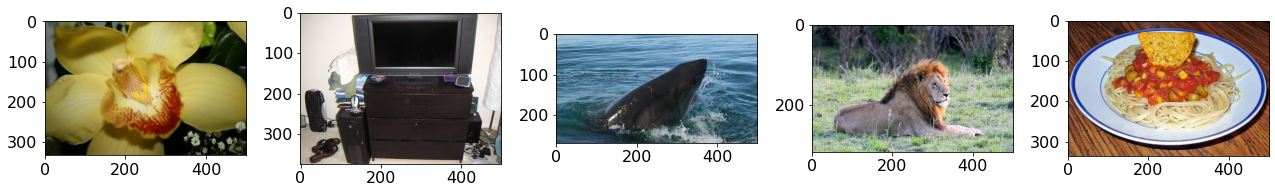

In [10]:
fig, _ = plt.subplots(1, len(lUrls), figsize=(18, 8))
for url, ax in zip(lUrls, fig.axes):
    mI = GetImageFromUrl(url)
    ax.imshow(mI.numpy().transpose((1,2,0)))
    
plt.tight_layout()
plt.show()

### Preprocess before applying CNNs:

In [15]:
vMean = torch.tensor([0.485, 0.456, 0.406])
vStd  = torch.tensor([0.229, 0.224, 0.225])

oPreprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=vMean, std=vStd),
])

### Plot after preprocess (except mean and std):

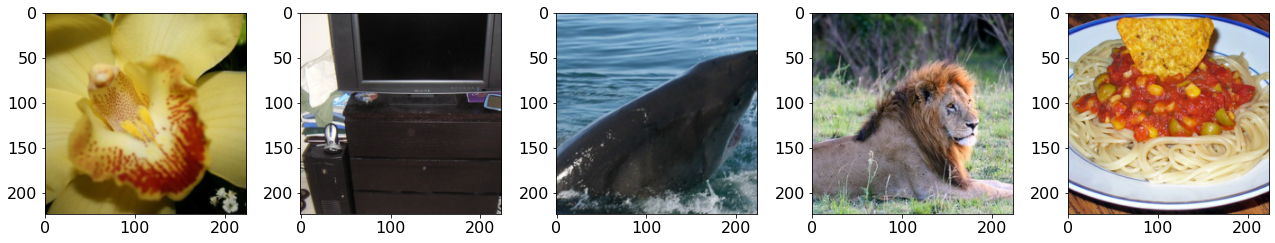

In [16]:
fig, _ = plt.subplots(1, len(lUrls), figsize=(18, 8))
for url, ax in zip(lUrls, fig.axes):
    mI = GetImageFromUrl(url)
    mI = oPreprocess(mI)
    mI = mI * vStd[:,None,None] + vMean[:,None,None]
    ax.imshow(mI.numpy().transpose((1,2,0)))
    
plt.tight_layout()
plt.show()

### AlexNet:

In [17]:
oAlexNet = torchvision.models.alexnet(pretrained=True)

torchsummary.summary(oAlexNet, (3, 224, 224)); print()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\Or/.cache\torch\hub\checkpoints\alexnet-owt-4df8aa71.pth



------------------------------------------------------------------------------------------
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 6, 6]           --
|    └─Conv2d: 2-1                       [-1, 64, 55, 55]          23,296
|    └─ReLU: 2-2                         [-1, 64, 55, 55]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 27, 27]          --
|    └─Conv2d: 2-4                       [-1, 192, 27, 27]         307,392
|    └─ReLU: 2-5                         [-1, 192, 27, 27]         --
|    └─MaxPool2d: 2-6                    [-1, 192, 13, 13]         --
|    └─Conv2d: 2-7                       [-1, 384, 13, 13]         663,936
|    └─ReLU: 2-8                         [-1, 384, 13, 13]         --
|    └─Conv2d: 2-9                       [-1, 256, 13, 13]         884,992
|    └─ReLU: 2-10                        [-1, 256, 13, 13]         --
|    └─Conv2d: 2-11                      [-1

In [12]:
oAlexNet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Switch to test mode:

In [18]:
print('Train mode:', oAlexNet.training)

oAlexNet.train(False)
print('Train mode:', oAlexNet.training)

Train mode: True
Train mode: False


### VGG-16:

In [19]:
oVGG16 = torchvision.models.vgg16()

torchsummary.summary(oVGG16, (3, 224, 224)); print()

------------------------------------------------------------------------------------------
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 25

In [20]:
oVGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### GoogLeNet (v1):

In [21]:
oGoogLeNet = torchvision.models.googlenet(aux_logits=False, pretrained=True)

torchsummary.summary(oGoogLeNet, (3, 224, 224)); print()

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\Or/.cache\torch\hub\checkpoints\googlenet-1378be20.pth



------------------------------------------------------------------------------------------
Layer (type:depth-idx)                   Output Shape              Param #
├─BasicConv2d: 1-1                       [-1, 64, 112, 112]        --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        9,408
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        128
├─MaxPool2d: 1-2                         [-1, 64, 56, 56]          --
├─BasicConv2d: 1-3                       [-1, 64, 56, 56]          --
|    └─Conv2d: 2-3                       [-1, 64, 56, 56]          4,096
|    └─BatchNorm2d: 2-4                  [-1, 64, 56, 56]          128
├─BasicConv2d: 1-4                       [-1, 192, 56, 56]         --
|    └─Conv2d: 2-5                       [-1, 192, 56, 56]         110,592
|    └─BatchNorm2d: 2-6                  [-1, 192, 56, 56]         384
├─MaxPool2d: 1-5                         [-1, 192, 28, 28]         --
├─Inception: 1-6                         [-1, 256

### ResNet 152:

In [22]:
oResNet152 = torchvision.models.resnet152(pretrained=True)

torchsummary.summary(oResNet152, (3, 224, 224)); print()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to C:\Users\Or/.cache\torch\hub\checkpoints\resnet152-b121ed2d.pth



------------------------------------------------------------------------------------------
Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        128
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-6                    [-1, 64, 

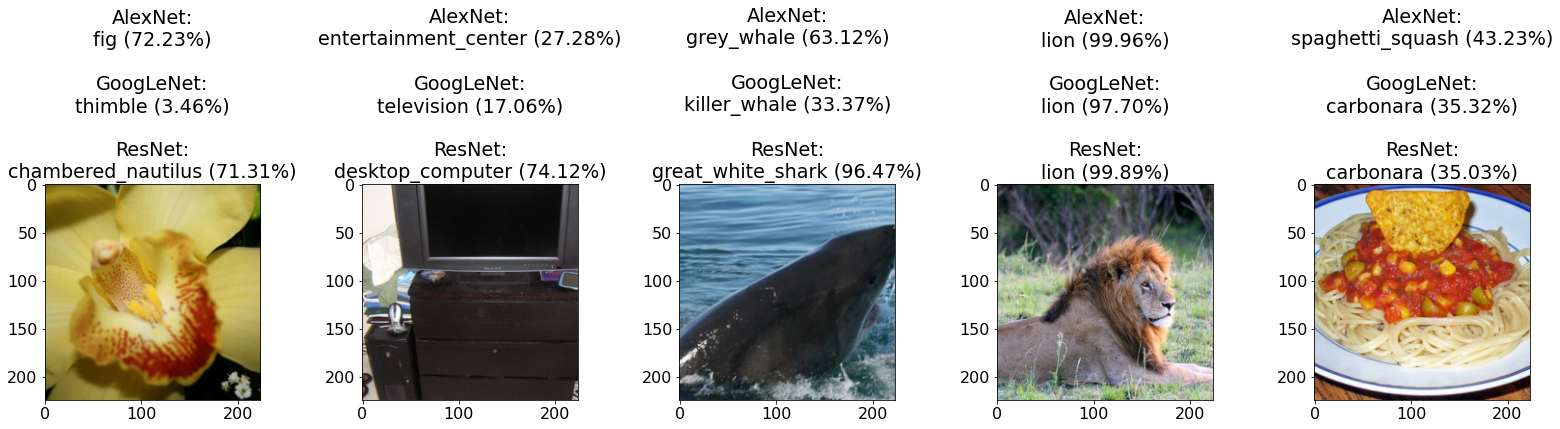

In [24]:
# device = 'cuda'
device = 'cpu'

lModel = [oAlexNet, oGoogLeNet, oResNet152]
fig, _ = plt.subplots(1, len(lUrls), figsize=(22, 12))
for url, ax in zip(lUrls, fig.axes):
    mI     = GetImageFromUrl(url)
    mI     = oPreprocess(mI)
    
    lP     = []
    lClass = []
    title  = ''
    for oModel in lModel:
        oModel.train(False)
        oModel.to(device)          
        mI    = mI.to(device)
        vHatY = oModel(mI.unsqueeze(0)).squeeze()
        vP    = torch.softmax(vHatY, dim=0)
        idx   = torch.argmax(vHatY)
        lP.append(vP[idx])
        lClass.append(lClasses[idx])
        title +=  oModel.__class__.__name__ + ':\n' + f'{lClasses[idx]} ({vP[idx]*100:.2f}%)' + '\n\n'
    
    title = title[:-2]
    mI2   = mI.cpu() * vStd[:,None,None] + vMean[:,None,None]
    ax.imshow(mI2.numpy().transpose((1,2,0)))
    ax.set_title(title)
    
plt.tight_layout()
plt.show()